In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=35ad49b79e41b272fcd2789a47a9d6abe119f46073ccc49fb082db2a3178b026
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

In [2]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [8]:
wget.download("https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")

'cats_and_dogs_filtered.zip'

In [9]:
wget.download("https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")

'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
data = "./"

In [0]:
!unzip -q cats_and_dogs_filtered.zip -d $data

In [0]:
train_folder = "./cats_and_dogs_filtered/train"
valid_folder = "./cats_and_dogs_filtered/validation"

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weight_file = "./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [0]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [0]:
pre_train_model = InceptionV3(
      input_shape = (200,200,3),
      weights = None,
      include_top = False
)
pre_train_model.load_weights(local_weight_file)

In [8]:
pre_train_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
for layers in pre_train_model.layers:
    layers.trainable = False

In [10]:
pre_train_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
pick_layer = pre_train_model.get_layer("mixed7")
layer_output = pick_layer.output

In [12]:
layer_output

<tf.Tensor 'mixed7/Identity:0' shape=(None, 10, 10, 768) dtype=float32>

In [0]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [0]:
x = layers.Flatten()(layer_output)
x = layers.Dense(1024, activation = "relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation = "sigmoid")(x)

model = Model(pre_train_model.input, x)
model.compile(
      optimizer = "adam",
      loss = "binary_crossentropy",
      metrics = ["acc"]
)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
gen_train_data = ImageDataGenerator(
      rescale = 1./255.,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True
)

In [0]:
gen_valid_data = ImageDataGenerator(
      rescale = 1./255.
)

In [19]:
train_aug = gen_train_data.flow_from_directory(
      train_folder,
      target_size = (200,200),
      class_mode = "binary",
      batch_size = 20
)

Found 2000 images belonging to 2 classes.


In [20]:
valid_aug = gen_valid_data.flow_from_directory(
      valid_folder,
      target_size = (200,200),
      class_mode = "binary",
      batch_size =20
)

Found 1000 images belonging to 2 classes.


In [21]:
H = model.fit_generator(
      train_aug,
      steps_per_epoch = 100,
      epochs = 20,
      verbose = 1,
      validation_data = valid_aug,
      validation_steps = 100
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 1503s 15s/step - loss: 1.0086 - acc: 0.8815 - val_loss: 0.3495 - val_acc: 0.9450
Epoch 2/20
100/100 [==============================] - 37s 371ms/step - loss: 0.4125 - acc: 0.9335 - val_loss: 0.1797 - val_acc: 0.9585
Epoch 3/20
100/100 [==============================] - 37s 369ms/step - loss: 0.2629 - acc: 0.9445 - val_loss: 0.0672 - val_acc: 0.9770
Epoch 4/20
100/100 [==============================] - 37s 371ms/step - loss: 0.1431 - acc: 0.9585 - val_loss: 0.0501 - val_acc: 0.9800
Epoch 5/20
100/100 [==============================] - 37s 374ms/step - loss: 0.1426 - acc: 0.9525 - val_loss: 0.0915 - val_acc: 0.9715
Epoch 6/20
100/100 [==============================] - 37s 367ms/step - loss: 0.1417 - acc: 0.9510 - val_loss: 0.0516 - val_acc: 0.9795
Epoch 7/20
100/100 [==============================] - 36s 365ms/step - loss: 0.0995 - acc: 0.9660 - val_loss: 0.06

In [0]:
model.save("classificationDogsOrCats_trainferLearning.h5")

In [33]:
valid_aug.class_indices

{'cats': 0, 'dogs': 1}

Saving ninja-cats-photography-hisakata-hiroyuki-59f19ad3a95f6880-1509356948262.jpg to ninja-cats-photography-hisakata-hiroyuki-59f19ad3a95f6880-1509356948262 (1).jpg
Classes's values =  [[0.00289501]]


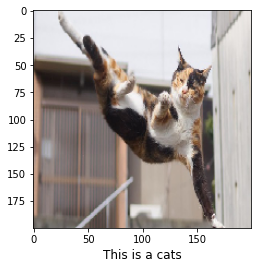

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, target_size = (200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)

    print("Classes's values = ", classes)

    if (classes[0] > 0.5):
        plt.imshow(img)
        plt.xlabel("This is a dogs", size = 12)
    else:
        plt.imshow(img)
        plt.xlabel("This is a cats", size = 12)